# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
df = pd.read_csv('/content/SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [17]:
faixas_latitude = pd.cut(x=df['munResLat'], bins=[sinasc_raw.munResLat.min(), -10.5, df.munResLat.max()])
pd.pivot_table(data=df,
               values=['munResLon','munResAlt'],
               index=faixas_latitude,
               aggfunc={('Soma',sum),
                        ('Média','mean'),
                        ('Mín',min),
                        ('Máx',max),
                        ('Mediana','median'),
                        ('Desvio padrão','std'),
                        ('Variância',np.var)
                       },
               dropna=False,
               sort=False).rename(columns={'munResLon': 'Longitude do município','munResAlt': 'Altitude do município'})

Longitude do município                                \
                             Variância   Mediana       Máx       Mín   
munResLat                                                              
(-13.5, -10.5]                1.514499 -61.90944 -60.13858 -65.32395   
(-10.5, -8.769]               0.394002 -63.83145 -61.99959 -65.32915   

                                                       Altitude do município  \
                         Soma Desvio padrão      Média             Variância   
munResLat                                                                      
(-13.5, -10.5]  -799413.46543      1.230650 -61.907649          19654.918293   
(-10.5, -8.769] -891822.01897      0.627696 -63.547244            904.290400   

                                                                            
                Mediana    Máx    Mín       Soma Desvio padrão       Média  
munResLat                                                                   
(-13.5, -10.5]    191.0  595.0  133.0  3291565.0    140.196000  254.903198  
(-10.5, -8.769]    87.0  192.0   85.0  1530415.0     30.071422  109.050520

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [19]:
faixas_area = pd.cut(x=df.munResArea, bins=[df.munResArea.min(), 3000,df.munResArea.max()])
pd.pivot_table(data=df,
               values=['QTDGESTANT','SEMAGESTAC'],
               index=faixas_area,
               aggfunc={('Soma',sum),
                        ('Média','mean'),
                        ('Mín',min),
                        ('Máx',max),
                        ('Mediana','median'),
                        ('Desvio padrão','std'),
                        ('Variância',np.var)
                       },
               dropna=False,
               sort=False).rename(
    columns={'QTDGESTANT': 'Gestações anteriores',
             'SEMAGESTAC': 'Semanas de gestação'})

Gestações anteriores                              \
                               Variância Mediana   Máx  Mín     Soma   
munResArea                                                             
(459.978, 3000.0]               1.463216     1.0   9.0  0.0   5804.0   
(3000.0, 34096.394]             2.095052     1.0  52.0  0.0  27046.0   

                                            Semanas de gestação                \
                    Desvio padrão     Média           Variância Mediana   Máx   
munResArea                                                                      
(459.978, 3000.0]        1.209635  1.135590            3.518305    39.0  45.0   
(3000.0, 34096.394]      1.447429  1.310368            4.201834    39.0  45.0   

                                                              
                      Mín      Soma Desvio padrão      Média  
munResArea                                                    
(459.978, 3000.0]    21.0  195118.0      1.875715  38.469637  
(3000.0, 34096.394]  19.0  797147.0      2.049838  38.591547

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [21]:
faixas_altitude = pd.qcut(x=df.munResAlt, q=4)
pd.pivot_table(data=df,
               values=['IDADEMAE','IDADEPAI'],
               index=faixas_altitude,
               aggfunc={('Soma',sum),
                        ('Média','mean'),
                        ('Mín',min),
                        ('Máx',max),
                        ('Mediana','median'),
                        ('Desvio padrão','std'),
                        ('Variância',np.var)
                       })

IDADEMAE                                                \
               Desvio padrão Mediana Máx      Média Mín    Soma  Variância   
munResAlt                                                                    
(84.999, 87.0]      6.543106    26.0  47  26.271598  12  230507  42.812240   
(87.0, 153.0]       6.389296    25.0  46  25.426155  11  123266  40.823100   
(153.0, 191.0]      6.240142    26.0  52  26.133468  12  181314  38.939370   
(191.0, 595.0]      6.294953    26.0  53  26.310499  13  170150  39.626433   

                    IDADEPAI                                           \
               Desvio padrão Mediana   Máx      Média   Mín      Soma   
munResAlt                                                               
(84.999, 87.0]      7.825714    32.0  65.0  32.285094  16.0   22309.0   
(87.0, 153.0]       8.729423    30.0  73.0  31.405844  17.0    9673.0   
(153.0, 191.0]      7.804884    30.0  70.0  30.915259  15.0  109811.0   
(191.0, 595.0]      7.594331    30.0  86.0  31.000000  16.0   94705.0   

                           
                Variância  
munResAlt                  
(84.999, 87.0]  61.241792  
(87.0, 153.0]   76.202832  
(153.0, 191.0]  60.916219  
(191.0, 595.0]  57.673870

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [27]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",

    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",

    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",

    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",

    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",

    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [36]:
df_imediata = df.set_index('munResNome')

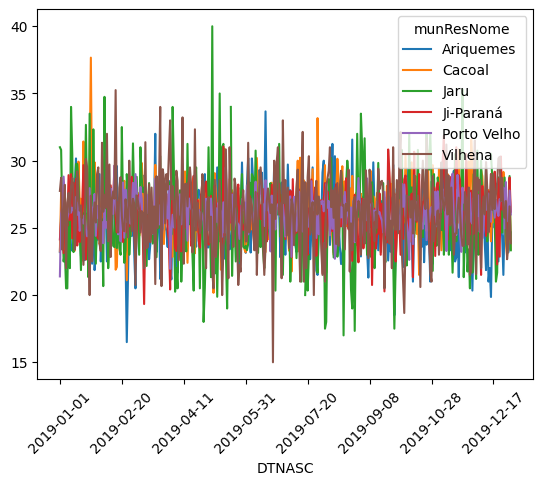

In [41]:
df_imediata.groupby(['DTNASC',imediatas])['IDADEMAE'].mean().unstack().plot()
plt.xticks(rotation=45);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [44]:
idh = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",

    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari":  "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada D'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",

    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}

df.set_index(['munResNome']).groupby(by=[idh])[['CONTADOR']].count()

,CONTADOR
munResNome,
IDH-M alto,16855
IDH-M baixo,1826
IDH-M médio,8346


In [45]:
df_idh = df.set_index('munResNome')
df_idh.groupby(idh)[['IDADEMAE', 'APGAR5']].agg(['mean','median', 'std'])

IDADEMAE                     APGAR5                 
                  mean median       std      mean median       std
munResNome                                                        
IDH-M alto   26.280332   26.0  6.415374  9.171668    9.0  0.758370
IDH-M baixo  25.326944   25.0  6.194908  9.172527    9.0  0.860797
IDH-M médio  25.884855   25.0  6.353274  9.195668    9.0  0.836771

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [46]:
ifdm = {
    "Ariquemes": "IFDM Desenvolvimento moderado",
    "Vilhena": "IFDM Desenvolvimento moderado",
    "Pimenta Bueno": "IFDM Desenvolvimento moderado",
    "Porto Velho": "IFDM Desenvolvimento moderado",
    "Ji-Paraná": "IFDM Desenvolvimento moderado",
    "Cacoal": "IFDM Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "IFDM Desenvolvimento moderado",
    "Rolim de Moura": "IFDM Desenvolvimento moderado",
    "Chupinguaia": "IFDM Desenvolvimento moderado",
    "São Miguel do Guaporé": "IFDM Desenvolvimento moderado",
    "Pimenteiras do Oeste": "IFDM Desenvolvimento moderado",
    "Teixeirópolis": "IFDM Desenvolvimento moderado",
    "Colorado do Oeste": "IFDM Desenvolvimento moderado",
    "Jaru": "IFDM Desenvolvimento moderado",
    "Rio Crespo": "IFDM Desenvolvimento moderado",
    "Primavera de Rondônia": "IFDM Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "IFDM Desenvolvimento moderado",
    "Ouro Preto do Oeste": "IFDM Desenvolvimento moderado",
    "São Francisco do Guaporé": "IFDM Desenvolvimento moderado",
    "Candeias do Jamari": "IFDM Desenvolvimento moderado",
    "Buritis": "IFDM Desenvolvimento moderado",
    "São Felipe D'Oeste": "IFDM Desenvolvimento moderado",
    "Presidente Médici": "IFDM Desenvolvimento moderado",
    "Cerejeiras": "IFDM Desenvolvimento moderado",
    "Monte Negro": "IFDM Desenvolvimento moderado",
    "Urupá": "IFDM Desenvolvimento moderado",

    "Espigão D'Oeste": "IFDM Desenvolvimento regular",
    "Seringueiras": "IFDM Desenvolvimento regular",
    "Alvorada D'Oeste": "IFDM Desenvolvimento regular",
    "Itapuã do Oeste": "IFDM Desenvolvimento regular",
    "Cabixi": "IFDM Desenvolvimento regular",
    "Novo Horizonte do Oeste": "IFDM Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "IFDM Desenvolvimento regular",
    "Vale do Paraíso": "IFDM Desenvolvimento regular",
    "Corumbiara": "IFDM Desenvolvimento regular",
    "Alto Paraíso": "IFDM Desenvolvimento regular",
    "Cacaulândia": "IFDM Desenvolvimento regular",
    "Vale do Anari": "IFDM Desenvolvimento regular",
    "Ministro Andreazza": "IFDM Desenvolvimento regular",
    "Costa Marques": "IFDM Desenvolvimento regular",
    "Nova União": "IFDM Desenvolvimento regular",
    "Guajará-Mirim": "IFDM Desenvolvimento regular",
    "Mirante da Serra": "IFDM Desenvolvimento regular",
    "Parecis": "IFDM Desenvolvimento regular",
    "Castanheiras": "IFDM Desenvolvimento regular",
    "Theobroma": "IFDM Desenvolvimento regular",
    "Machadinho D'Oeste": "IFDM Desenvolvimento regular",
    "Campo Novo de Rondônia": "IFDM Desenvolvimento regular",
    "Nova Mamoré": "IFDM Desenvolvimento regular",
    "Cujubim": "IFDM Desenvolvimento regular",
    "Alto Alegre dos Parecis": "IFDM Desenvolvimento regular",
    "Governador Jorge Teixeira": "IFDM Desenvolvimento regular",
}

df.set_index(['munResNome']).groupby(by=[ifdm])[['CONTADOR']].count()

,CONTADOR
munResNome,
IFDM Desenvolvimento moderado,21946
IFDM Desenvolvimento regular,5081


In [48]:
df_ifdm = df.set_index('munResNome')
df_ifdm.groupby(ifdm)[['IDADEPAI']].agg(['count','mean', 'median'])

IDADEPAI                  
                                 count       mean median
munResNome                                              
IFDM Desenvolvimento moderado     6225  31.061687   30.0
IFDM Desenvolvimento regular      1381  31.237509   30.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [49]:
pib = {
    "Porto Velho": "PIB Acima de 1 Bilhão",
    "Ji-Paraná": "PIB Acima de 1 Bilhão",
    "Vilhena": "PIB Acima de 1 Bilhão",
    "Ariquemes": "PIB Acima de 1 Bilhão",
    "Cacoal": "PIB Acima de 1 Bilhão",
    "Jaru": "PIB Acima de 1 Bilhão",
    "Rolim de Moura": "PIB Acima de 1 Bilhão",
    "Pimenta Bueno": "PIB Acima de 1 Bilhão",

    "Guajará-Mirim": "PIB Acima de 500 Milhões",
    "Ouro Preto do Oeste": "PIB Acima de 500 Milhões",
    "Buritis": "PIB Acima de 500 Milhões",
    "Machadinho D'Oeste": "PIB Acima de 500 Milhões",
    "Espigão D'Oeste": "PIB Acima de 500 Milhões",
    "São Miguel do Guaporé": "PIB Acima de 500 Milhões",
    "Candeias do Jamari": "PIB Acima de 500 Milhões",
    "Nova Mamoré": "PIB Acima de 500 Milhões",
    "Cerejeiras": "PIB Acima de 500 Milhões",

    "Alta Floresta D'Oeste": "PIB Acima de 300 Milhões",
    "Presidente Médici": "PIB Acima de 300 Milhões",
    "Cujubim": "PIB Acima de 300 Milhões",
    "Nova Brasilândia D'Oeste": "PIB Acima de 300 Milhões",
    "Alto Paraíso": "PIB Acima de 300 Milhões",
    "São Francisco do Guaporé": "PIB Acima de 300 Milhões",
    "Colorado do Oeste": "PIB Acima de 300 Milhões",

    "Monte Negro": "PIB Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "PIB Acima de 200 Milhões",
    "Campo Novo de Rondônia": "PIB Acima de 200 Milhões",
    "Alvorada D'Oeste": "PIB Acima de 200 Milhões",

    "Chupinguaia": "PIB Acima de 100 Milhões",
    "Corumbiara": "PIB Acima de 100 Milhões",
    "Ministro Andreazza": "PIB Acima de 100 Milhões",
    "Urupá": "PIB Acima de 100 Milhões",
    "Costa Marques": "PIB Acima de 100 Milhões",
    "Seringueiras": "PIB Acima de 100 Milhões",
    "Mirante da Serra": "PIB Acima de 100 Milhões",
    "Governador Jorge Teixeira": "PIB Acima de 100 Milhões",
    "Theobroma": "PIB Acima de 100 Milhões",
    "Santa Luzia D'Oeste": "PIB Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "PIB Acima de 100 Milhões",
    "Itapuã do Oeste": "PIB Acima de 100 Milhões",
    "Vale do Paraíso": "PIB Acima de 100 Milhões",
    "Cacaulândia": "PIB Acima de 100 Milhões",
    "Cabixi": "PIB Acima de 100 Milhões",
    "Vale do Anari": "PIB Acima de 100 Milhões",

    "Nova União": "PIB Até 100 Milhões",
    "Parecis": "PIB Até 100 Milhões",
    "Rio Crespo": "PIB Até 100 Milhões",
    "Pimenteiras do Oeste": "PIB Até 100 Milhões",
    "Teixeirópolis": "PIB Até 100 Milhões",
    "São Felipe D'Oeste": "PIB Até 100 Milhões",
    "Castanheiras": "PIB Até 100 Milhões",
    "Primavera de Rondônia": "PIB Até 100 Milhões",
}

df.set_index(['munResNome']).groupby(by=[pib])[['CONTADOR']].count()

,CONTADOR
munResNome,
PIB Acima de 1 Bilhão,17736
PIB Acima de 100 Milhões,1952
PIB Acima de 200 Milhões,724
PIB Acima de 300 Milhões,1880
PIB Acima de 500 Milhões,4304
PIB Até 100 Milhões,431


In [50]:
df_pib = df.set_index('munResNome')
df_pib.groupby(pib)[['IDADEPAI', 'IDADEMAE']].agg(['count','mean', 'max', 'min'])

IDADEPAI                        IDADEMAE             \
                            count       mean   max   min    count       mean   
munResNome                                                                     
PIB Acima de 1 Bilhão        4650  31.108387  70.0  15.0    17736  26.265562   
PIB Acima de 100 Milhões      666  31.602102  73.0  17.0     1952  25.662910   
PIB Acima de 200 Milhões      295  30.386441  55.0  16.0      724  25.323204   
PIB Acima de 300 Milhões      638  30.183386  64.0  16.0     1880  25.833511   
PIB Acima de 500 Milhões     1087  31.322907  86.0  16.0     4304  25.782528   
PIB Até 100 Milhões           270  31.585185  67.0  17.0      431  26.515081   

                                  
                         max min  
munResNome                        
PIB Acima de 1 Bilhão     47  12  
PIB Acima de 100 Milhões  52  12  
PIB Acima de 200 Milhões  44  13  
PIB Acima de 300 Milhões  53  11  
PIB Acima de 500 Milhões  53  13  
PIB Até 100 Milhões       41  14

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- As análises dos fatores geográficos, como latitude, longitude, altitude e área do município, não apresentaram influência significativa na qualidade da gestação, no parto e na saúde dos bebês.
- Durante todo o ano de 2019,segundo o grafico ao longo do tempo a idade media das mulheres, a idade média das mães permaneceu constante, situando-se na faixa dos 25 anos, independentemente da região imediata do estado.
- Com relação ao IDH, vemos que a idade da mâe e o APGAR da criança é bem semelhante para cada faixa de valores
- Considerando o IFDM, vemos que a idade do pai é bem semelhante para cada faixa de valores


